In [1]:
%pylab
%matplotlib inline
import seaborn as sns
sns.set()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
#data
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [3]:
class my_pca():
    def __init__(self, k = 1):
        self.k = k
    
    def normalize(self, X):
        #正则化
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        return (X - mean) / std
    
    def fit(self, X):
        self.X = X
        m, n = X.shape
        norm_X = self.normalize(X)
        cov_X = 1/m * np.dot(norm_X.T, norm_X)#计算相关矩阵
        [U, S, V] = np.linalg.svd(cov_X)#奇异值分解
        
        self.V = V
        self.S = S
        self.U = U[:, :self.k]#降至k维
        
    def components_(self):
        return self.U
    
    def transfrom(self):
        norm_X = self.normalize(X)
        return np.dot(norm_X, self.U)
    

In [4]:
pca = my_pca(k=1)
pca.fit(X)

In [5]:
proj = pca.transfrom()

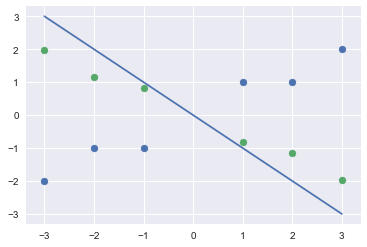

In [6]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[:, 0], proj)
w = pca.U
xx = np.linspace(X.min(), X.max(), 50)
yy = -(w[0])*xx / w[1]

plt.plot(xx, yy)

In [8]:
img = plt.imread('/Users/Hichens/Desktop/bird_small.png')

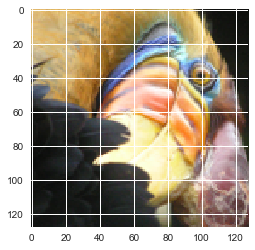

In [9]:
plt.imshow(img)

In [10]:
pca.fit(img)

ValueError: too many values to unpack (expected 2)